基于mnist数据集，建立mlp模型，实现0-9数字的十分类task：
1.实现mnist数据载入，可视化图形数字
2.完成数据预处理: 图像数据维度转换与归一化、输出结果格式转换
3.计算模型在预测数据集的准确率
4.模型结构：两层隐藏层，每层有392个神经元

In [1]:
# load the mnist data
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 195s 17us/step


In [6]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


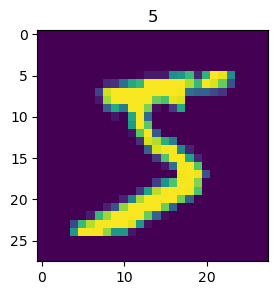

In [8]:
# visualize the data
img1 = X_train[0]
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [10]:
img1.shape

(28, 28)

In [43]:
# format the input data
feature_size = img1.shape[0]*img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)

print(X_train_format.shape)

(60000, 784)


In [44]:
# normalize the input data
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [46]:
# format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=feature_size))
mlp.add(Dense(units=392,activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465706 (1.78 MB)
Trainable params: 465706 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# configure the model
mlp.compile(optimizer='adam',loss='categorical_crossentropy')

In [26]:
# train the model
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3443
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1477
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0930
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131


In [28]:
import numpy as np

In [37]:
# efvaluate the model
y_train_predict = np.argmax(mlp.predict(X_train_normal), axis=1)
print(y_train_predict)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1875/1875 [==============================] - 2s 1ms/step
[5 0 4 ... 5 6 8]
0.99795


In [47]:
y_test_predict = np.argmax(mlp.predict(X_test_normal), axis=1)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

313/313 [==============================] - 0s 1ms/step
0.9787


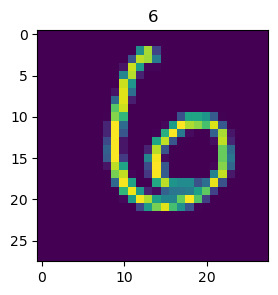

In [50]:
img2 = X_test[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()

图像数字多分类实战summary:
1、通过mlp模型，实现了基于图像数据的数字自动识别分类；
2、完成了图像的数字化处理与可视化；
3、对mlp模型的输入、输出数据格式有了更深的认识，完成了数据预处理与格式转换；
4、建立了结构更为复杂的mlp模型；
5、mnist数据集地址: http://yann.lecun.com/exdb/mnist/